<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo ** | Módulos e pacotes
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>from / import / as;</li>
  <li>Módulo;</li>
  <li>Pacote;</li>
  <li>Baixando pacotes.</li>
</ol>

---

# **Exercícios**

## 0\. Preparação do ambiente

Neste exercício vamos utilizar a base de dados de ações da bolsa de valores dos EUA, a Dow Jones. Os dados estão disponíveis para *download* neste [link](https://archive.ics.uci.edu/ml/datasets/Dow+Jones+Index). Vamos utilizar o pacote `wget` para fazer o *download* dos dados.

 - Instalando o pacote `wget` na versão 3.2.

In [1]:
!pip install wget==3.2

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=006187bd695f7696a5cdb91e098c39a76b683fc75972bd7978aef50d42cb7826
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


 - Fazendo o download dos dados no arquivo compactado `dados.zip`.

In [2]:
import wget

wget.download(url='https://archive.ics.uci.edu/ml/machine-learning-databases/00312/dow_jones_index.zip', out='./dados.zip')

'./dados.zip'

 - Descompactando os `dados` na pasta dados com o pacote nativo `zipfile`.

In [3]:
import zipfile

with zipfile.ZipFile('./dados.zip', 'r') as fp:
  fp.extractall('./dados')

Verifique a pasta dados criada, ela deve conter dois arquivos:

 - **dow_jones_index.data**: um arquivo com os dados;
 - **dow_jones_index.names**: um arquivo com a descrição completa dos dados.

É possível observar que o arquivo de dados é um arquivo separado por virgulas, o famoso `csv`. Vamos renomear o arquivo de dados para que ele tenha a extensão `csv` com o pacote nativo `os`.

- Renomeando o arquivo com o pacote nativo `os`.

In [4]:
import os

os.rename('./dados/dow_jones_index.data', './dados/dow_jones_index.csv')

Pronto! Abra o arquivo e o Google Colab irá apresentar uma visualização bem legal dos dados.

---

## 1\. Pandas

Para processar os dados, vamos utilizar o pacote `pandas` na versão `1.1.5`. A documentação completa por ser encontrada neste [link](https://pandas.pydata.org/docs/)

In [7]:
!pip install pandas==2.1.4

  Using cached pandas-2.1.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
Using cached pandas-2.1.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.3 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


Vamos importar o pacote com o apelido (alias) `pd`.

In [8]:
import pandas as pd

Estamos prontos para ler o arquivo.

In [9]:
df = pd.read_csv('./dados/dow_jones_index.csv')

O pandas trabalha com o conceito de dataframe, uma estrutura de dados com muitos métodos e atributos que aceleram o processamento de dados. Alguns exemplos:

 - Visualizando as `n` primeiras linhas:

In [10]:
df.head(n=10)

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.792670,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.428490,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.470660,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.638310,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.933250,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029
5,1,AA,2/11/2011,$17.33,$17.48,$16.97,$17.37,114691279,0.230814,-25.712195,154387761.0,$17.39,$17.28,-0.632547,90,0.172712
6,1,AA,2/18/2011,$17.39,$17.68,$17.28,$17.28,80023895,-0.632547,-30.226696,114691279.0,$16.98,$16.68,-1.766780,83,0.173611
7,1,AA,2/25/2011,$16.98,$17.15,$15.96,$16.68,132981863,-1.766780,66.177694,80023895.0,$16.81,$16.58,-1.368230,76,0.179856
8,1,AA,3/4/2011,$16.81,$16.94,$16.13,$16.58,109493077,-1.368230,-17.663150,132981863.0,$16.58,$16.03,-3.317250,69,0.180941
9,1,AA,3/11/2011,$16.58,$16.75,$15.42,$16.03,114332562,-3.317250,4.419900,109493077.0,$15.95,$16.11,1.003130,62,0.187149


 - Visualizando o nome das colunas:

In [11]:
df.columns.to_list()

['quarter',
 'stock',
 'date',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'percent_change_price',
 'percent_change_volume_over_last_wk',
 'previous_weeks_volume',
 'next_weeks_open',
 'next_weeks_close',
 'percent_change_next_weeks_price',
 'days_to_next_dividend',
 'percent_return_next_dividend']

 - Verificando o número de linhas e colunas.

In [12]:
linhas, colunas = df.shape
print(f'Número de linhas: {linhas}')
print(f'Número de colunas: {colunas}')

Número de linhas: 750
Número de colunas: 16


Vamos selecionar os valores de abertura, fechamento, máximo e mínimo das ações do McDonalds, listado na Dow Jones como MCD:

 - Selecionando as linha do dataframe original `df` em que a coluna `stock` é igual a `MCD`.

In [13]:
df_mcd = df[df['stock'] == 'MCD']

 - Selecionando apenas as colunas de data e valores de ações.

In [14]:
df_mcd = df_mcd[['date', 'open', 'high', 'low', 'close']]

Excelente, o problema é que as colunas com os valores possuem o carater `$` e são do tipo texto (`object` no `pandas`).

In [15]:
df_mcd.head(n=10)

,date,open,high,low,close
216,1/7/2011,$77.10,$77.59,$73.59,$74.37
217,1/14/2011,$74.25,$74.49,$72.46,$74.06
218,1/21/2011,$74.65,$75.75,$74.31,$75.01
219,1/28/2011,$74.25,$75.85,$73.05,$73.28
220,2/4/2011,$73.80,$74.50,$73.08,$74.05
221,2/11/2011,$74.13,$76.32,$73.30,$76.14
222,2/18/2011,$76.07,$76.45,$75.70,$76.13
223,2/25/2011,$75.95,$76.45,$74.42,$74.44
224,3/4/2011,$74.51,$76.63,$73.64,$76.03
225,3/11/2011,$76.38,$77.25,$74.97,$76.73


In [16]:
df_mcd.dtypes

,0
date,object
open,object
high,object
low,object
close,object


Vamos limpar as colunas com o método `apply`, que permite a aplicação de uma função anônima (`lambda`) qualquer. A função `lambda` remove o caracter **$** e faz a conversão do tipo de `str` para `float`.

In [17]:
for col in ['open', 'high', 'low', 'close']:
  df_mcd[col] = df_mcd[col].apply(lambda value: float(value.split(sep='$')[-1]))

Verifique novamente os dados e seus tipos.

In [18]:
df_mcd.head(n=10)

,date,open,high,low,close
216,1/7/2011,77.10,77.59,73.59,74.37
217,1/14/2011,74.25,74.49,72.46,74.06
218,1/21/2011,74.65,75.75,74.31,75.01
219,1/28/2011,74.25,75.85,73.05,73.28
220,2/4/2011,73.80,74.50,73.08,74.05
221,2/11/2011,74.13,76.32,73.30,76.14
222,2/18/2011,76.07,76.45,75.70,76.13
223,2/25/2011,75.95,76.45,74.42,74.44
224,3/4/2011,74.51,76.63,73.64,76.03
225,3/11/2011,76.38,77.25,74.97,76.73


In [21]:
df_mcd.dtypes

,0
date,object
open,float64
high,float64
low,float64
close,float64


Excelente, agora podemos explorar os dados visualmente.

**Agora é a sua vez!** Conduza o mesmo processo para extrair e tratar os dados da empresa Coca-Cola (`stock` column igual a `KO`).

 - Selecionando as linha do dataframe original `df` em que a coluna `stock` é igual a `KO`.

In [22]:
# Filtrando os dados para Coca-Cola
df_ko = df[df['stock'] == 'KO']

Vamos selecionar os valores de abertura, fechamento, máximo e mínimo das ações da empresa Coca-Cola, listado na Dow Jones como KO:

 - Selecionando apenas as colunas de data e valores de ações.

In [23]:
# Selecionando as colunas de interesse
df_ko = df_ko[['date', 'open', 'high', 'low', 'close']]

Excelente, o problema é que as colunas com os valores possuem o carater `$` e são do tipo texto (`object` no `pandas`).

In [24]:
# Limpando as colunas removendo o símbolo $ e convertendo para float
for col in ['open', 'high', 'low', 'close']:
    df_ko[col] = df_ko[col].apply(lambda value: float(value.replace('$', '')))

In [25]:
# Verificar as primeiras 10 linhas após a limpeza
print(df_ko.head(10))

# Verificar os tipos de dados
print(df_ko.dtypes)

          date   open   high    low  close
204   1/7/2011  65.88  65.88  62.56  62.92
205  1/14/2011  62.70  63.86  62.56  63.13
206  1/21/2011  63.21  63.92  62.72  62.77
207  1/28/2011  62.87  63.31  62.14  62.21
208   2/4/2011  62.32  63.48  61.89  62.56
209  2/11/2011  62.67  64.75  62.32  63.57
210  2/18/2011  63.67  64.72  62.55  64.55
211  2/25/2011  63.36  64.40  63.33  64.31
212   3/4/2011  64.17  65.87  63.86  65.21
213  3/11/2011  65.32  65.84  64.47  64.81
date      object
open     float64
high     float64
low      float64
close    float64
dtype: object


Vamos limpar as colunas com o método `apply`, que permite a aplicação de uma função anônima (`lambda`) qualquer. A função `lambda` remove o caracter **$** e faz a conversão do tipo de `str` para `float`.

In [ ]:
for col in ['open', 'high', 'low', 'close']:
    df_ko[col] = df_ko[col].apply(lambda value: float(value.replace('$', '')))

Verifique novamente os dados e seus tipos.

In [31]:
print(df_ko)

          date   open   high    low  close
204   1/7/2011  65.88  65.88  62.56  62.92
205  1/14/2011  62.70  63.86  62.56  63.13
206  1/21/2011  63.21  63.92  62.72  62.77
207  1/28/2011  62.87  63.31  62.14  62.21
208   2/4/2011  62.32  63.48  61.89  62.56
209  2/11/2011  62.67  64.75  62.32  63.57
210  2/18/2011  63.67  64.72  62.55  64.55
211  2/25/2011  63.36  64.40  63.33  64.31
212   3/4/2011  64.17  65.87  63.86  65.21
213  3/11/2011  65.32  65.84  64.47  64.81
214  3/18/2011  64.34  64.61  61.29  62.70
215  3/25/2011  63.13  65.39  63.05  65.22
581   4/1/2011  65.20  67.48  65.03  67.22
582   4/8/2011  67.22  67.82  66.86  67.27
583  4/15/2011  67.25  68.47  66.41  68.01
584  4/21/2011  67.57  68.05  66.64  67.88
585  4/29/2011  67.95  67.98  65.81  67.46
586   5/6/2011  67.76  67.93  66.40  66.90
587  5/13/2011  66.86  68.77  66.83  68.18
588  5/20/2011  68.10  68.70  67.50  68.30
589  5/27/2011  67.59  67.90  66.30  66.51
590   6/3/2011  66.94  67.24  65.21  65.53
591  6/10/2

In [36]:
print(df_ko.dtypes)

date      object
open     float64
high     float64
low      float64
close    float64
dtype: object


Excelente, agora podemos explorar os dados visualmente.

---

## 2\. Seaborn

Para visualizar os dados, vamos utilizar o pacote `seaborn` na versão `0.11.1`. A documentação completa por ser encontrada neste [link](https://seaborn.pydata.org/)

In [37]:
!pip install seaborn==0.11.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.0/285.0 kB 7.6 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


Vamos importar o pacote com o apelido (alias) `sns`.

In [38]:
import seaborn as sns

Vamos visualizar os valores de abertura das ações ao longo do tempo.

<ipython-input-39-533bf4eae097>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = plot.set_xticklabels(labels=df_mcd['date'], rotation=90)


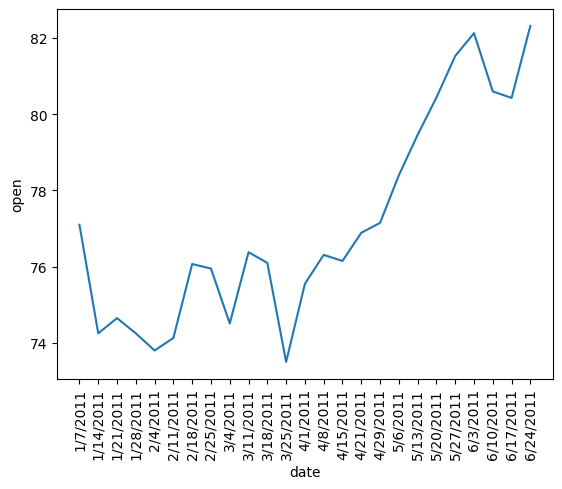

In [39]:
plot = sns.lineplot(x="date", y="open", data=df_mcd)
_ = plot.set_xticklabels(labels=df_mcd['date'], rotation=90)

# Nova seção

Vamos também visualizar os valores de fechamento das ações ao longo do tempo.

<ipython-input-40-1af5daa54bb0>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = plot.set_xticklabels(labels=df_mcd['date'], rotation=90)


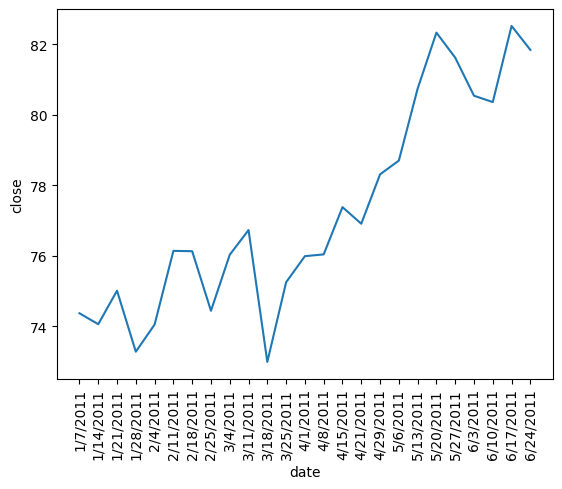

In [40]:
plot = sns.lineplot(x="date", y="close", data=df_mcd)
_ = plot.set_xticklabels(labels=df_mcd['date'], rotation=90)

Para facilitar a comparação, vamo visualizar os quatro valores no mesmo gráfico.

<ipython-input-42-754274876e32>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = plot.set_xticklabels(labels=df_mcd['date'], rotation=90)


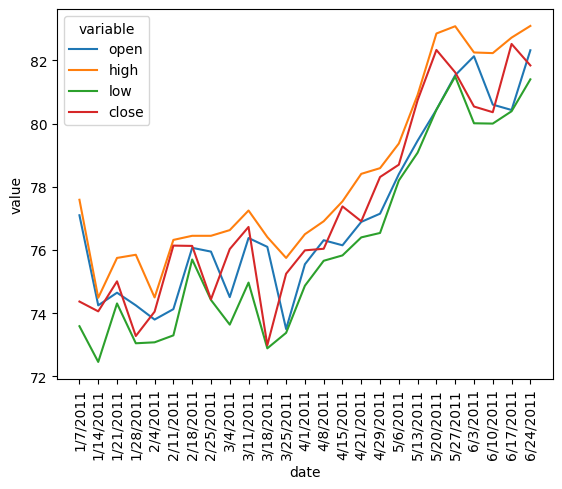

In [42]:
plot = sns.lineplot(x="date", y="value", hue='variable', data=pd.melt(df_mcd, ['date']))
_ = plot.set_xticklabels(labels=df_mcd['date'], rotation=90)

Para finalizar, vamos salvar o gráfico numa figura.

In [43]:
plot.figure.savefig("./mcd.png")

**Agora é a sua vez,** faça o gráfico acima para a empresa Coca-Cola e salve a imagem com o nome `ko.png`.

In [44]:
# DataFrame em formato "melt" para a Coca-Cola
df_ko_melted = pd.melt(df_ko, ['date'])

Vamos visualizar os valores de abertura das ações ao longo do tempo.

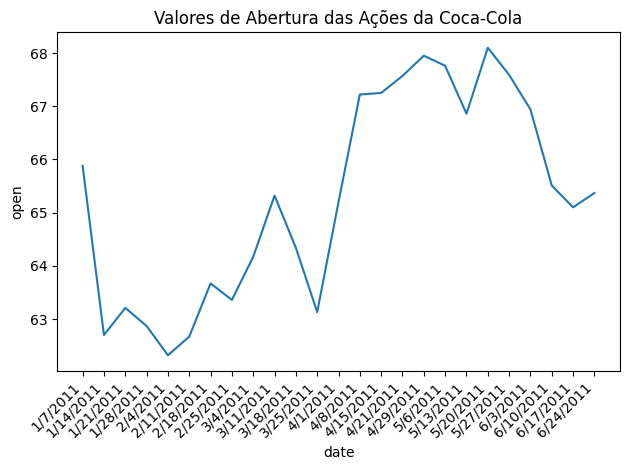

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar os valores de abertura ao longo do tempo
plot = sns.lineplot(x="date", y="open", data=df_ko)
plot.set(title='Valores de Abertura das Ações da Coca-Cola')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Vamos também visualizar os valores de fechamento das ações ao longo do tempo.

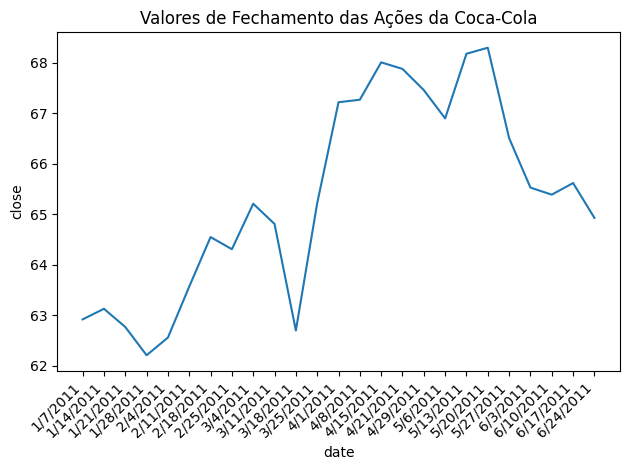

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar os valores de fechamento ao longo do tempo
plot = sns.lineplot(x="date", y="close", data=df_ko)
plot.set(title='Valores de Fechamento das Ações da Coca-Cola')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Para facilitar a comparação, vamo visualizar os quatro valores no mesmo gráfico.

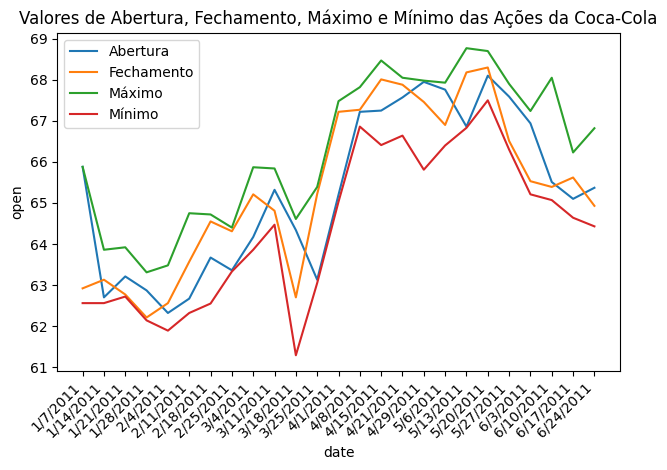

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar todos os quatro valores no mesmo gráfico
plot = sns.lineplot(x="date", y="open", data=df_ko, label='Abertura')
sns.lineplot(x="date", y="close", data=df_ko, label='Fechamento')
sns.lineplot(x="date", y="high", data=df_ko, label='Máximo')
sns.lineplot(x="date", y="low", data=df_ko, label='Mínimo')

plot.set(title='Valores de Abertura, Fechamento, Máximo e Mínimo das Ações da Coca-Cola')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Para finalizar, vamos salvar o gráfico numa figura.

In [50]:
plt.savefig("ko.png")

<Figure size 640x480 with 0 Axes>

Analise as duas imagens e escreva pelo menos um *insight* que você consegue extrair dos dados. Fique a vontade para escrever quantos *insights* você quiser.

Obs: *Insights* são observações sobre o que você percebe/entende/interpreta em suas análises. No caso deste exercício, você vai analisar os dados dos gráficos da empresa McDonalds e da empresa Cola-Cola e notar o que os dados gerados podem ser interessante, que tipo de interpretação o comportamento dos dados estão te trazendo.

---

# **# Insight #1:** Tendência de crescimento e queda.




**Observação para Coca-Cola:** Tanto o gráfico de abertura quanto o de fechamento mostram uma clara tendência de crescimento que começa por volta de março de 2011 e atinge seu pico em meados de maio. No entanto, há uma queda significativa no final de maio e junho.


**Interpretação:** Esse comportamento pode ser resultado de eventos de mercado, como relatórios de lucros trimestrais, mudanças na demanda do mercado ou até mesmo influências externas, como mudanças regulatórias ou eventos geopolíticos.

# **Insight #2:** Declínio final

**Observação para Coca-Cola:** A partir do final de maio até junho, tanto os valores de abertura quanto de fechamento mostram uma queda constante.

**nterpretação:** Essa queda pode ser resultado de uma correção no mercado, possivelmente após um aumento sustentado nos meses anteriores. Eventos como relatórios financeiros ou mudanças na economia global poderiam ter levado a uma realização de lucros ou a uma correção natural no mercado de ações.